* Import external libraries:

In [1]:
%matplotlib inline
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import copy
import numpy as np
import scipy as scy
from scipy.ndimage import filters
import pandas

import datetime

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 16})

# Example trypsin-benzamidine

* **read in mean waiting times at higher temperatures**

* left_to_right (lr) indicates dissociation;  right_to_left (rl) indicates association

In [2]:
lr_380K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_380K_left_to_right.dat")
lr_400K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_400K_left_to_right.dat")
lr_420K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_420K_left_to_right.dat")
lr_450K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_450K_left_to_right.dat")
lr_500K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_500K_left_to_right.dat")
lr_550K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_550K_left_to_right.dat")
lr_600K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_600K_left_to_right.dat")
lr_650K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_650K_left_to_right.dat")
lr_700K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_700K_left_to_right.dat")
lr_750K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_750K_left_to_right.dat")
lr_800K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_800K_left_to_right.dat")
lr_850K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_850K_left_to_right.dat")
lr_900K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_900K_left_to_right.dat")

rl_380K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_380K_right_to_left.dat")
rl_400K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_400K_right_to_left.dat")
rl_420K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_420K_right_to_left.dat")
rl_450K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_450K_right_to_left.dat")
rl_500K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_500K_right_to_left.dat")
rl_550K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_550K_right_to_left.dat")
rl_600K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_600K_right_to_left.dat")
rl_650K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_650K_right_to_left.dat")
rl_700K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_700K_right_to_left.dat")
rl_750K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_750K_right_to_left.dat")
rl_800K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_800K_right_to_left.dat")
rl_850K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_850K_right_to_left.dat")
rl_900K = np.loadtxt("./Trypsin83middle_LE_10fsdt_10ms_10timesmass_1pmres_900K_right_to_left.dat")

* define standard error of the mean

In [3]:
def stderr(time):
    out = np.std(time)/np.sqrt(len(time))
    return out

In [4]:
Trypsin_lr_t = np.array([np.mean(lr_380K),np.mean(lr_400K),np.mean(lr_420K),np.mean(lr_450K),np.mean(lr_500K),\
                         np.mean(lr_550K),np.mean(lr_600K),np.mean(lr_650K),np.mean(lr_700K),\
                        np.mean(lr_750K),np.mean(lr_800K),np.mean(lr_850K),np.mean(lr_900K)])
Trypsin_lr_S = np.array([stderr(lr_380K),stderr(lr_400K),stderr(lr_420K),stderr(lr_450K),\
                         stderr(lr_500K),stderr(lr_550K),stderr(lr_600K),stderr(lr_650K),stderr(lr_700K),\
                        stderr(lr_750K),stderr(lr_800K),stderr(lr_850K),stderr(lr_900K)])
Trypsin_rl_t = np.array([np.mean(rl_380K),np.mean(rl_400K),np.mean(rl_420K),np.mean(rl_450K),np.mean(rl_500K),\
                         np.mean(rl_550K),np.mean(rl_600K),np.mean(rl_650K),np.mean(rl_700K),\
                        np.mean(rl_750K),np.mean(rl_800K),np.mean(rl_850K),np.mean(rl_900K)])
Trypsin_rl_S = np.array([stderr(rl_380K),stderr(rl_400K),stderr(rl_420K),stderr(rl_450K),\
                         stderr(rl_500K),stderr(rl_550K),stderr(rl_600K),stderr(rl_650K),stderr(rl_700K),\
                        stderr(rl_750K),stderr(rl_800K),stderr(rl_850K),stderr(rl_900K)])
Trypsin_lr_T = np.array([380.,400.,420.,450.,500.,550.,600.,650.,700.,750.,800.,850.,900.])
Trypsin_rl_T = np.array([380.,400.,420.,450.,500.,550.,600.,650.,700.,750.,800.,850.,900.])

k_B = 0.008314

In [5]:
Trypsin_lr_k = 1E9/Trypsin_lr_t
Trypsin_lr_kS = 1E9/Trypsin_lr_k

Trypsin_rl_k = 1E9/Trypsin_rl_t
Trypsin_rl_kS = 1E9/Trypsin_rl_k

* fit formula and porcedure:

In [6]:
def Tjump(T,dGtrans,t_0):
    t = t_0 * np.exp( -(dGtrans/k_B) * ((T-T_0)/(T*T_0)) )
    return t

* **unbinding times:**

In [7]:
#T_0 = 420.
T_0 = 290.15

* fit procedure (remember to adjust start parameters and bounds according to your own problem!)

In [8]:
Tjump_lr_opt, Tjump_lr_cov = scy.optimize.curve_fit(Tjump, Trypsin_lr_T, Trypsin_lr_t, sigma=Trypsin_lr_S,\
                                                    p0=(45.,1), bounds=([30.,0.],[50.,2E9]))
Tjump_lr_err = np.sqrt(np.diag(Tjump_lr_cov))

In [9]:
Tjump_lr_opt

array([  3.96022965e+01,   3.74202836e+06])

In [10]:
Tjump_lr_cov

array([[  3.06430205e-02,   3.01652688e+04],
       [  3.01652688e+04,   2.98796423e+10]])

* fit error:

In [11]:
Tjump_lr_err

array([  1.75051480e-01,   1.72857289e+05])

* $R^2$ value:

In [12]:
y = Trypsin_lr_t
y_fit = Tjump(Trypsin_lr_T,Tjump_lr_opt[0],Tjump_lr_opt[1])

ss_res = np.sum((y - y_fit) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

In [13]:
r2

0.8992794855540468

* fit quality:

In [14]:
x = np.linspace(280,900,781)

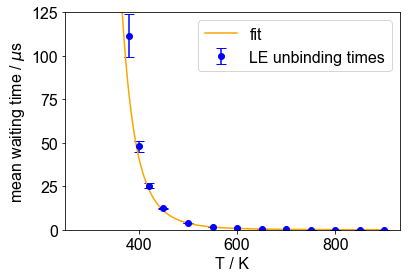

In [15]:
#model 2
plt.errorbar(Trypsin_lr_T,Trypsin_lr_t/1000,yerr=Trypsin_lr_S/1000,marker='o',\
             linestyle='',color='blue',capsize=5.,label='LE unbinding times')
#plt.plot(600,t_0,'ro')
plt.plot(x,Tjump(x,Tjump_lr_opt[0],Tjump_lr_opt[1])/1000,color='orange',label='fit')
#plt.plot(x,Tjump(x,45.),label='expected')
plt.xlabel('T / K')
plt.ylabel('mean waiting time / $\mu$s')
plt.ylim(0,125.)
plt.legend()
#plt.savefig("./figs/Trypsin83middle_LE_10mus_res10fs_lrTjump.pdf")
plt.show()

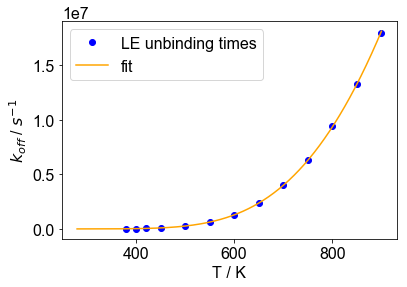

In [16]:
#model 2
plt.plot(Trypsin_lr_T,1E9/Trypsin_lr_t,'bo',label='LE unbinding times')
#plt.plot(600,1E9/t_0,'ro')
#plt.plot(x,1E9/Tjump(x,45.,420.),label='expected')
plt.plot(x,1E9/Tjump(x,Tjump_lr_opt[0],Tjump_lr_opt[1]),color='orange',label='fit')
plt.xlabel('T / K')
plt.ylabel('$k_{off}$ / $s^{-1}$')
plt.legend()
#plt.savefig("./figs/Trypsin83middle_LE_10mus_res10fs_lrTjump_const.pdf")
plt.show()

* **dissociation rate estimate:**

In [17]:
lr_rate = 1E9/Tjump(290.15,Tjump_lr_opt[0],Tjump_lr_opt[1])

In [18]:
lr_rate

267.23474661949734

error for fit-based calculation: Z = 1/A => err(Z) = Z*err(A)/A

In [19]:
lr_rate_err = (1E9/Tjump(300,Tjump_lr_opt[0],Tjump_lr_opt[1])) * Tjump(300.,Tjump_lr_err[0],Tjump_lr_err[1]) / Tjump(300.,Tjump_lr_opt[0],Tjump_lr_opt[1]) 

In [20]:
lr_rate_err

36.192895956361426

exp. value: 6 x 10$^2$ s$^{-1}$

In [21]:
lr_exp = 1/(6E2*1E-6)

* **binding times:**

In [22]:
#T_0 = 420.
T_0 = 290.15

In [23]:
Tjump_rl_opt, Tjump_rl_cov = scy.optimize.curve_fit(Tjump, Trypsin_rl_T, Trypsin_rl_t, sigma=Trypsin_rl_S,\
                                                    p0=(20.,0.), bounds=([10.,0.],[30.,2E6]))
Tjump_rl_err = np.sqrt(np.diag(Tjump_rl_cov))

In [24]:
Tjump_rl_opt

array([   16.24227773,  2325.87156422])

In [25]:
Tjump_rl_cov

array([[  1.34489564e-02,   8.22358627e+00],
       [  8.22358627e+00,   5.06272143e+03]])

In [26]:
Tjump_rl_err

array([  0.11596964,  71.15280337])

In [27]:
y = Trypsin_rl_t
y_fit = Tjump(Trypsin_rl_T,Tjump_rl_opt[0],Tjump_rl_opt[1])

ss_res = np.sum((y - y_fit) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

In [28]:
r2

0.98611986217019176

In [29]:
x = np.linspace(350,900,751)

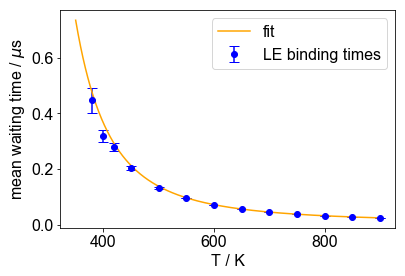

In [30]:
#model 2
#plt.plot(600,t_0,'ro')
plt.errorbar(Trypsin_rl_T,Trypsin_rl_t/1000,yerr=Trypsin_rl_S/1000,marker='o',color='blue',\
             capsize=5.,linestyle='',label='LE binding times')
plt.plot(x,Tjump(x,Tjump_rl_opt[0],Tjump_rl_opt[1])/1000,label='fit',color='orange')
#plt.ylim(0,3.)
plt.xlabel('T / K')
plt.ylabel('mean waiting time / $\mu$s')
plt.legend()
#plt.savefig("./figs/Trypsin83middle_LE_10mus_res10fs_rlTjump.pdf")
plt.show()

In [31]:
x = np.linspace(280,900,781)

In [32]:
1E9/Tjump(290.15,Tjump_rl_opt[0],Tjump_rl_opt[1])

429946.35446858394

calculate: spheric box #box of dim. 7.5276 x 7.5276 x 5.3221 nm^3:

In [33]:
l = (4/3) * np.pi * (2**3) * (10**(-24)) #7.5276 * 7.5276 * 5.3221 * (10**(-24)) # volume in l = dm^3

In [34]:
N_A = 6.022 * (10**23) # mol^-1

In [35]:
M = 1/(l*N_A) # mol/l

In [36]:
M

0.049554220906227804

* **binding rate estimate:**

In [37]:
rl_rate = 1E9/(Tjump(290.15,Tjump_rl_opt[0],Tjump_rl_opt[1]) * M)

In [38]:
rl_rate

8676281.1846477799

error for fit-based calculation: Z = 1/A => err(Z) = Z*err(A)/A

In [39]:
rl_rate_err = (1E9/(Tjump(300,Tjump_rl_opt[0],Tjump_rl_opt[1])* M)) * Tjump(300.,Tjump_rl_err[0],Tjump_rl_err[1]) / Tjump(300.,Tjump_rl_opt[0],Tjump_rl_opt[1]) 

In [40]:
rl_rate_err

412356.78153964772

In [41]:
rl_exp = 1/(2.9E7*M*1E-6)

exp. value: 2.9 x 10$^{7}$ M$^{^-1}$ s$^{^-1}$

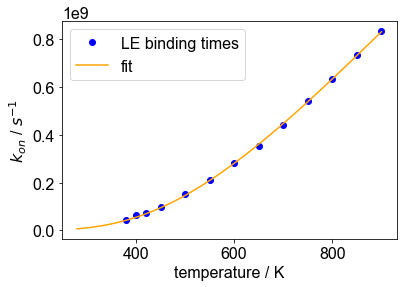

In [42]:
plt.plot(Trypsin_rl_T,1E9/(Trypsin_rl_t * M),'bo',label='LE binding times')
#plt.plot(600,1E9/t_0,'ro')
#plt.plot(x,1E9/(Tjump(x,20.,600.)*M),label='expected')
plt.plot(x,1E9/(Tjump(x,Tjump_rl_opt[0],Tjump_rl_opt[1])*M),label='fit',color='orange')
plt.xlabel('temperature / K')
plt.ylabel('$k_{on}$ / $s^{-1}$')
plt.legend()
plt.savefig("./figs/Trypsin83middle_LE_10mus_res10fs_rlTjump_const.pdf")
plt.show()

* **overall rate estimate plot**

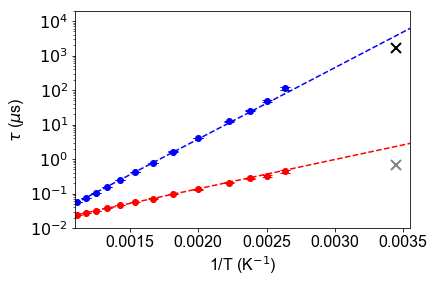

In [43]:
plt.errorbar(1/Trypsin_rl_T,Trypsin_rl_t/1000,yerr=Trypsin_rl_S/1000,marker='o',\
             linestyle='',color='red',capsize=5.,label='LE unbinding times')
plt.plot(1/290.15,lr_exp,'kx',mew=2,ms=10)
plt.plot(1/x,Tjump(x,Tjump_rl_opt[0],Tjump_rl_opt[1])/1000,'r--',label='fit')
plt.errorbar(1/Trypsin_lr_T,Trypsin_lr_t/1000,yerr=Trypsin_lr_S/1000,marker='o',\
             linestyle='',color='blue',capsize=5.,label='LE unbinding times')
#plt.plot(600,t_0,'ro')
plt.plot(1/x,Tjump(x,Tjump_lr_opt[0],Tjump_lr_opt[1])/1000,'b--',label='fit')
plt.plot(1/290.15,rl_exp,'x',mew=2,ms=10,color='grey')
#plt.plot(x,Tjump(x,45.),label='expected')
plt.xlabel('1/T (K$^{-1}$)')
plt.yscale('log')
plt.xlim(0.0011,0.00355)
plt.ylim(1E-2,2E4)
plt.ylabel(r'$\tau$ ($\mu$s)')
#plt.savefig("./figs/Trypsin83middle_LE_10mus_res10fs_10timesmass_Tjump_logscale.pdf")
plt.show()

* **$K_D$ calculation**

In [44]:
K_D = lr_rate / rl_rate

In [45]:
K_D

3.0800609262451643e-05

In [46]:
K_D_err = ((lr_rate_err / lr_rate) + (rl_rate_err / rl_rate)) * K_D

In [47]:
K_D_err

5.6353332747907157e-06

# Appendix